# DS101 Lab 2: Importing and exporting structured data to and from Python
## Tracking socio-economic outcomes in the BRICS

## Working with Python using <font color='green'>Jupyter notebooks</font>

Jupyter notebooks are a useful scratchpad for working with data.

The notebook structure means code is entered and prcessed inside individual cells, rather than as entire (end-to-end) script. Jupyter works with Python, and Google Colab is a cloud store for Jupyter notebooks attached to a backend that can run your code – without having to worry about the details of installing many packages (and their dependencies).

- Place the cursor inside a cell to make edits
- Press `shift`+ENTER to run the code in a cell
 - That progresses the cursor to the next cell

Just follow the instructions above each cell. Ask for help with any technical problems.

## Outline

We undertake the following steps:

- Source information
- Gather data
- Storage
- Load
- Clean
- Pre-process
- Build a dataset
 - EDA
- Processing
- Visualisation
- Export

## Getting started with Python
### Loading libraries

Powerful languages like Python and R thrive on the ecosystem of user-created packages.

We import *(or, "load")* a few of these packages here:

- `numpy` -- gives python more efficient way to work with arrays
- `pandas` -- gives a way to work with (row and column) labelled arrays

These are very common modules to use whenever you want to work with datasets.

In [16]:
import numpy as np
import pandas as pd
from plotnine import *

## Sourcing data

On the left-handside, create a new folder `DS101_data` and drop your `WDI_metrics.csv` file here

## Loading data

Loading data into Python is fairly straightforward.  We use a **file path** which tells Python where to look for the data followed by a `/` separator followed by the name of the file (`WDI_metrics.csv`).

Python provides the `os` module (Operating System Interface) -- with dozens of functions for interacting with the operating system: https://docs.python.org/3/tutorial/stdlib.html

It's a part of the standard library (i.e. the core of Python), and it mirrors the way that you would work with your own operating system if your were doing that by hand (or from the command line).

### "cwd" means "current working directory"

To find out what your working directory is, we can import the `os` module and use the function: `os.getcwd()`.

In [17]:
import os
os.getcwd()

'/Users/shujaali/Downloads'

We are going to load our data into a python module called **pandas** -- it is specialised for handling tables of data called "**dataframes**"

- In this case, our variable is called `wb_metrics`, and that hold our dataframe

In [18]:
wb_metrics = pd.read_csv("/Users/shujaali/Downloads/WDI_metrics.csv", na_values="..").dropna(subset = "Series Code")

## Dataset exploration

*What does this data look like?*

Just "print" the dataframe

- Replace this code with `wb_metrics.head()`
- Try using different integers inside the brackets:
 - e.g. `wb_metrics.head(1)`

In [19]:
# wb_metrics
wb_metrics.head(3)

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,19542982.0,19688632.0,21000256.0,22645130.0,23553551.0,24411191.0,25442944.0,25903301.0,26427199.0,27385307.0,28189672.0,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0
1,"Population, total",SP.POP.TOTL,Albania,ALB,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0
2,"Population, total",SP.POP.TOTL,Algeria,DZA,30774621.0,31200985.0,31624696.0,32055883.0,32510186.0,32956690.0,33435080.0,33983827.0,34569592.0,35196037.0,35856344.0,36543541.0,37260563.0,38000626.0,38760168.0,39543154.0


Pandas allows us to view different portion of our dataframe, using e.g. .iloc[]:

- The first integer is the row
- The second integer is the column

We can specify rows an columns using named labels too.

Here we select column subsets using the "slice" notation -- try changing the values

In [20]:
wb_metrics.iloc[0:4, 0:10]

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,19542982.0,19688632.0,21000256.0,22645130.0,23553551.0,24411191.0
1,"Population, total",SP.POP.TOTL,Albania,ALB,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0
2,"Population, total",SP.POP.TOTL,Algeria,DZA,30774621.0,31200985.0,31624696.0,32055883.0,32510186.0,32956690.0
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,58230.0,58324.0,58177.0,57941.0,57626.0,57254.0


In [21]:
wb_metrics.shape

(11067, 20)

In [22]:
wb_metrics.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]'],
      dtype='object')

In [23]:
wb_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11067 entries, 0 to 11066
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    11067 non-null  object 
 1   Series Code    11067 non-null  object 
 2   Country Name   11067 non-null  object 
 3   Country Code   11067 non-null  object 
 4   2000 [YR2000]  7943 non-null   float64
 5   2001 [YR2001]  7816 non-null   float64
 6   2002 [YR2002]  7915 non-null   float64
 7   2003 [YR2003]  8084 non-null   float64
 8   2004 [YR2004]  8214 non-null   float64
 9   2005 [YR2005]  8324 non-null   float64
 10  2006 [YR2006]  8376 non-null   float64
 11  2007 [YR2007]  8432 non-null   float64
 12  2008 [YR2008]  8455 non-null   float64
 13  2009 [YR2009]  8524 non-null   float64
 14  2010 [YR2010]  8597 non-null   float64
 15  2011 [YR2011]  8630 non-null   float64
 16  2012 [YR2012]  8646 non-null   float64
 17  2013 [YR2013]  8633 non-null   float64
 18  2014 [YR201

## Readability

The column labels are not great, in particular, they contain square brackets [ and ] which could easily be mistaken for (what are known as) operators within python: python thinks a symbol like this means you are working with "lists"

Let's get rid of these and make our code more readable for human beings in the process

In [24]:
colnames = ["series_name", "series_code", "country_name", "country_code"]
colnames = colnames + ["yr_" + str(x) for x in range(2000, 2016)]
wb_metrics.columns = colnames

### Column names

In [25]:
print(wb_metrics.columns)

Index(['series_name', 'series_code', 'country_name', 'country_code', 'yr_2000',
       'yr_2001', 'yr_2002', 'yr_2003', 'yr_2004', 'yr_2005', 'yr_2006',
       'yr_2007', 'yr_2008', 'yr_2009', 'yr_2010', 'yr_2011', 'yr_2012',
       'yr_2013', 'yr_2014', 'yr_2015'],
      dtype='object')


## Fix to reflect the categorical nature of the datatype

In the "series name", "series code" and "country code" columns.
We will stick with strings for "country name" for now

In [26]:
wb_metrics_cat = wb_metrics.copy()
wb_metrics_cat[["series_name", "series_code", "country_code"]] = wb_metrics_cat[["series_name", "series_code", "country_code"]].astype("category")
wb_metrics_cat[["country_name"]] = wb_metrics_cat[["country_name"]].astype("string")
wb_metrics_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11067 entries, 0 to 11066
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   series_name   11067 non-null  category
 1   series_code   11067 non-null  category
 2   country_name  11067 non-null  string  
 3   country_code  11067 non-null  category
 4   yr_2000       7943 non-null   float64 
 5   yr_2001       7816 non-null   float64 
 6   yr_2002       7915 non-null   float64 
 7   yr_2003       8084 non-null   float64 
 8   yr_2004       8214 non-null   float64 
 9   yr_2005       8324 non-null   float64 
 10  yr_2006       8376 non-null   float64 
 11  yr_2007       8432 non-null   float64 
 12  yr_2008       8455 non-null   float64 
 13  yr_2009       8524 non-null   float64 
 14  yr_2010       8597 non-null   float64 
 15  yr_2011       8630 non-null   float64 
 16  yr_2012       8646 non-null   float64 
 17  yr_2013       8633 non-null   float64 
 18  yr_2014    

Note how much smaller the dataframe has become (~10%)

## What metrics are in the data set?

The function `unique()` creates a list from a repeating list of entries.

The following gives us a way to see the unique entries in a column. In this case, each entry is associated with a series, so now we know all the series within the table:

In [27]:
all_series = wb_metrics["series_name"].unique()
print(all_series)

['Population, total' 'Population growth (annual %)'
 'Surface area (sq. km)'
 'Poverty headcount ratio at national poverty lines (% of population)'
 'GNI, Atlas method (current US$)'
 'GNI per capita, Atlas method (current US$)'
 'GNI, PPP (current international $)'
 'GNI per capita, PPP (current international $)'
 'Income share held by lowest 20%'
 'Life expectancy at birth, total (years)'
 'Fertility rate, total (births per woman)'
 'Adolescent fertility rate (births per 1,000 women ages 15-19)'
 'Contraceptive prevalence, any method (% of married women ages 15-49)'
 'Births attended by skilled health staff (% of total)'
 'Mortality rate, under-5 (per 1,000 live births)'
 'Prevalence of underweight, weight for age (% of children under 5)'
 'Immunization, measles (% of children ages 12-23 months)'
 'Primary completion rate, total (% of relevant age group)'
 'School enrollment, secondary (% gross)'
 'School enrollment, primary and secondary (gross), gender parity index (GPI)'
 'Prevale

## Select a subset of rows, by series

### By **category**

In [28]:
gdp_0 = wb_metrics_cat[ wb_metrics_cat['series_name'] == 'GDP (current US$)' ]
gdp_0.head(10)

,series_name,series_code,country_name,country_code,yr_2000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,yr_2007,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015
5642,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,3.521418e+09,2.813572e+09,3.825701e+09,4.520947e+09,5.224897e+09,6.203257e+09,6.971758e+09,9.747886e+09,1.010930e+10,1.241615e+10,1.585667e+10,1.780510e+10,1.990733e+10,2.014642e+10,2.049713e+10,1.913422e+10
5643,GDP (current US$),NY.GDP.MKTP.CD,Albania,ALB,3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052077e+09,8.896075e+09,1.067732e+10,1.288135e+10,1.204421e+10,1.192693e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10
5644,GDP (current US$),NY.GDP.MKTP.CD,Algeria,DZA,5.479040e+10,5.941340e+10,6.151610e+10,7.348226e+10,9.191368e+10,1.070466e+11,1.230843e+11,1.424827e+11,1.803838e+11,1.503173e+11,1.777851e+11,2.183319e+11,2.271437e+11,2.297014e+11,2.389427e+11,1.874939e+11
5645,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,ASM,NaN,NaN,5.120000e+08,5.240000e+08,5.090000e+08,5.000000e+08,4.930000e+08,5.180000e+08,5.600000e+08,6.750000e+08,5.730000e+08,5.700000e+08,6.400000e+08,6.380000e+08,6.430000e+08,6.730000e+08
5646,GDP (current US$),NY.GDP.MKTP.CD,Andorra,AND,1.432606e+09,1.548266e+09,1.764280e+09,2.366942e+09,2.900245e+09,3.161084e+09,3.459338e+09,3.957625e+09,4.102319e+09,3.688976e+09,3.449926e+09,3.629134e+09,3.188653e+09,3.193513e+09,3.271686e+09,2.789881e+09
5647,GDP (current US$),NY.GDP.MKTP.CD,Angola,AGO,9.129595e+09,8.936079e+09,1.528559e+10,1.781270e+10,2.355206e+10,3.697090e+10,5.238103e+10,6.526642e+10,8.853867e+10,7.030720e+10,8.379947e+10,1.117897e+11,1.280529e+11,1.323391e+11,1.359668e+11,9.049642e+10
5648,GDP (current US$),NY.GDP.MKTP.CD,Antigua and Barbuda,ATG,9.005519e+08,8.775148e+08,8.979889e+08,9.479556e+08,1.026181e+09,1.143715e+09,1.303548e+09,1.487300e+09,1.557541e+09,1.386444e+09,1.298256e+09,1.281337e+09,1.327107e+09,1.325426e+09,1.378830e+09,1.437756e+09
5649,GDP (current US$),NY.GDP.MKTP.CD,Argentina,ARG,2.842038e+11,2.686968e+11,9.772400e+10,1.275870e+11,1.646579e+11,1.987371e+11,2.325573e+11,2.875305e+11,3.615580e+11,3.329765e+11,4.236274e+11,5.301581e+11,5.459824e+11,5.520251e+11,5.263197e+11,5.947493e+11
5650,GDP (current US$),NY.GDP.MKTP.CD,Armenia,ARM,1.911564e+09,2.118468e+09,2.376335e+09,2.807061e+09,3.576615e+09,4.900470e+09,6.384452e+09,9.206301e+09,1.166204e+10,8.647937e+09,9.260286e+09,1.014211e+10,1.061932e+10,1.112146e+10,1.160951e+10,1.055334e+10
5651,GDP (current US$),NY.GDP.MKTP.CD,Aruba,ABW,1.873453e+09,1.896457e+09,1.961844e+09,2.044112e+09,2.254831e+09,2.360017e+09,2.469783e+09,2.677641e+09,2.843025e+09,2.553793e+09,2.453597e+09,2.637859e+09,2.615208e+09,2.727850e+09,2.790850e+09,2.962907e+09


### By **string**

In [29]:
gdp = wb_metrics.query("series_name == 'GDP (current US$)'")
gdp.head(5)

,series_name,series_code,country_name,country_code,yr_2000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,yr_2007,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015
5642,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,3.521418e+09,2.813572e+09,3.825701e+09,4.520947e+09,5.224897e+09,6.203257e+09,6.971758e+09,9.747886e+09,1.010930e+10,1.241615e+10,1.585667e+10,1.780510e+10,1.990733e+10,2.014642e+10,2.049713e+10,1.913422e+10
5643,GDP (current US$),NY.GDP.MKTP.CD,Albania,ALB,3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052077e+09,8.896075e+09,1.067732e+10,1.288135e+10,1.204421e+10,1.192693e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10
5644,GDP (current US$),NY.GDP.MKTP.CD,Algeria,DZA,5.479040e+10,5.941340e+10,6.151610e+10,7.348226e+10,9.191368e+10,1.070466e+11,1.230843e+11,1.424827e+11,1.803838e+11,1.503173e+11,1.777851e+11,2.183319e+11,2.271437e+11,2.297014e+11,2.389427e+11,1.874939e+11
5645,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,ASM,NaN,NaN,5.120000e+08,5.240000e+08,5.090000e+08,5.000000e+08,4.930000e+08,5.180000e+08,5.600000e+08,6.750000e+08,5.730000e+08,5.700000e+08,6.400000e+08,6.380000e+08,6.430000e+08,6.730000e+08
5646,GDP (current US$),NY.GDP.MKTP.CD,Andorra,AND,1.432606e+09,1.548266e+09,1.764280e+09,2.366942e+09,2.900245e+09,3.161084e+09,3.459338e+09,3.957625e+09,4.102319e+09,3.688976e+09,3.449926e+09,3.629134e+09,3.188653e+09,3.193513e+09,3.271686e+09,2.789881e+09


## Cleaning

From here, we need to get the data into a consistent and "tidy" format.  For the first chunk, we remove unnecessary variables.

In [30]:
gdp = gdp.drop(columns = ["series_name", "series_code", "country_code"])

In [31]:
gdp

,country_name,yr_2000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,yr_2007,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015
5642,Afghanistan,3.521418e+09,2.813572e+09,3.825701e+09,4.520947e+09,5.224897e+09,6.203257e+09,6.971758e+09,9.747886e+09,1.010930e+10,1.241615e+10,1.585667e+10,1.780510e+10,1.990733e+10,2.014642e+10,2.049713e+10,1.913422e+10
5643,Albania,3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052077e+09,8.896075e+09,1.067732e+10,1.288135e+10,1.204421e+10,1.192693e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10
5644,Algeria,5.479040e+10,5.941340e+10,6.151610e+10,7.348226e+10,9.191368e+10,1.070466e+11,1.230843e+11,1.424827e+11,1.803838e+11,1.503173e+11,1.777851e+11,2.183319e+11,2.271437e+11,2.297014e+11,2.389427e+11,1.874939e+11
5645,American Samoa,NaN,NaN,5.120000e+08,5.240000e+08,5.090000e+08,5.000000e+08,4.930000e+08,5.180000e+08,5.600000e+08,6.750000e+08,5.730000e+08,5.700000e+08,6.400000e+08,6.380000e+08,6.430000e+08,6.730000e+08
5646,Andorra,1.432606e+09,1.548266e+09,1.764280e+09,2.366942e+09,2.900245e+09,3.161084e+09,3.459338e+09,3.957625e+09,4.102319e+09,3.688976e+09,3.449926e+09,3.629134e+09,3.188653e+09,3.193513e+09,3.271686e+09,2.789881e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,Virgin Islands (U.S.),NaN,NaN,3.262000e+09,3.443000e+09,3.797000e+09,4.428000e+09,4.484000e+09,4.784000e+09,4.244000e+09,4.201000e+09,4.324000e+09,4.223000e+09,4.089000e+09,3.738000e+09,3.565000e+09,3.663000e+09
5855,West Bank and Gaza,4.313600e+09,4.003700e+09,3.555800e+09,3.968000e+09,4.603100e+09,5.125700e+09,5.348300e+09,5.815700e+09,7.310400e+09,8.085700e+09,9.681500e+09,1.118610e+10,1.220840e+10,1.351550e+10,1.398970e+10,1.397240e+10
5856,"Yemen, Rep.",9.679317e+09,9.852991e+09,1.069343e+10,1.177753e+10,1.386763e+10,1.673157e+10,1.906314e+10,2.165053e+10,2.691086e+10,2.513028e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041523e+10,4.322859e+10,4.244449e+10
5857,Zambia,3.600632e+09,4.094441e+09,4.193850e+09,4.901870e+09,6.221110e+09,8.331870e+09,1.275686e+10,1.405696e+10,1.791086e+10,1.532834e+10,2.026556e+10,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10


## Change the 'shape' of our table to suit our analysis – using `melt()`

This is a fairly sophisticated feature of the pandas API that 'pivots' a table into a new structure and layout

To get data into tidy format, we need to stack the variables with the `yr_` prefix on top of one another.  We also need to convert the `year` column to an integer so that we can plot GDP across different countries.

In [32]:
gdp_long = pd.melt(gdp, id_vars = "country_name", var_name = "year", value_name = "gdp")
gdp_long["year"] = gdp_long["year"].str.replace("yr_", "").astype(int)
print(gdp_long)

               country_name  year           gdp
0               Afghanistan  2000  3.521418e+09
1                   Albania  2000  3.480355e+09
2                   Algeria  2000  5.479040e+10
3            American Samoa  2000           NaN
4                   Andorra  2000  1.432606e+09
...                     ...   ...           ...
3467  Virgin Islands (U.S.)  2015  3.663000e+09
3468     West Bank and Gaza  2015  1.397240e+10
3469            Yemen, Rep.  2015  4.244449e+10
3470                 Zambia  2015  2.125122e+10
3471               Zimbabwe  2015  1.996312e+10

[3472 rows x 3 columns]


## Creating a graph of BRICS GDP

In [33]:
brics = ["Brazil", "Russian Federation", "India", "China", "South Africa"]
gdp_brics = gdp_long.query("country_name in @brics")
#gdp_brics["gdp"] = gdp_brics["gdp"] / 1e12
gdp_brics.loc[:, "gdp"] = gdp_brics["gdp"].astype(float) / 1e12
print(gdp_brics)

            country_name  year        gdp
26                Brazil  2000   0.655448
41                 China  2000   1.211332
88                 India  2000   0.468396
160   Russian Federation  2000   0.259710
176         South Africa  2000   0.151753
...                  ...   ...        ...
3281              Brazil  2015   1.802212
3296               China  2015  11.061573
3343               India  2015   2.103588
3415  Russian Federation  2015   1.363482
3431        South Africa  2015   0.346710

[80 rows x 3 columns]


## Aggregation by 'group'

We want a summary statistic for each 'group'

- Summary statistics on each **year**
 - sum
 - mean

In [34]:
total_gdp_brics = gdp_brics.groupby("year", as_index = False)["gdp"].sum()
mean_gdp_brics = gdp_brics.groupby("year", as_index = False)["gdp"].mean()

## Visualisation -- "Visual Storytelling"

Visualise to observe any patterns – *'seeing' as a form of understanding*

- What happens between 2005 and 2010?

Matplotlib is building the font cache; this may take a moment.


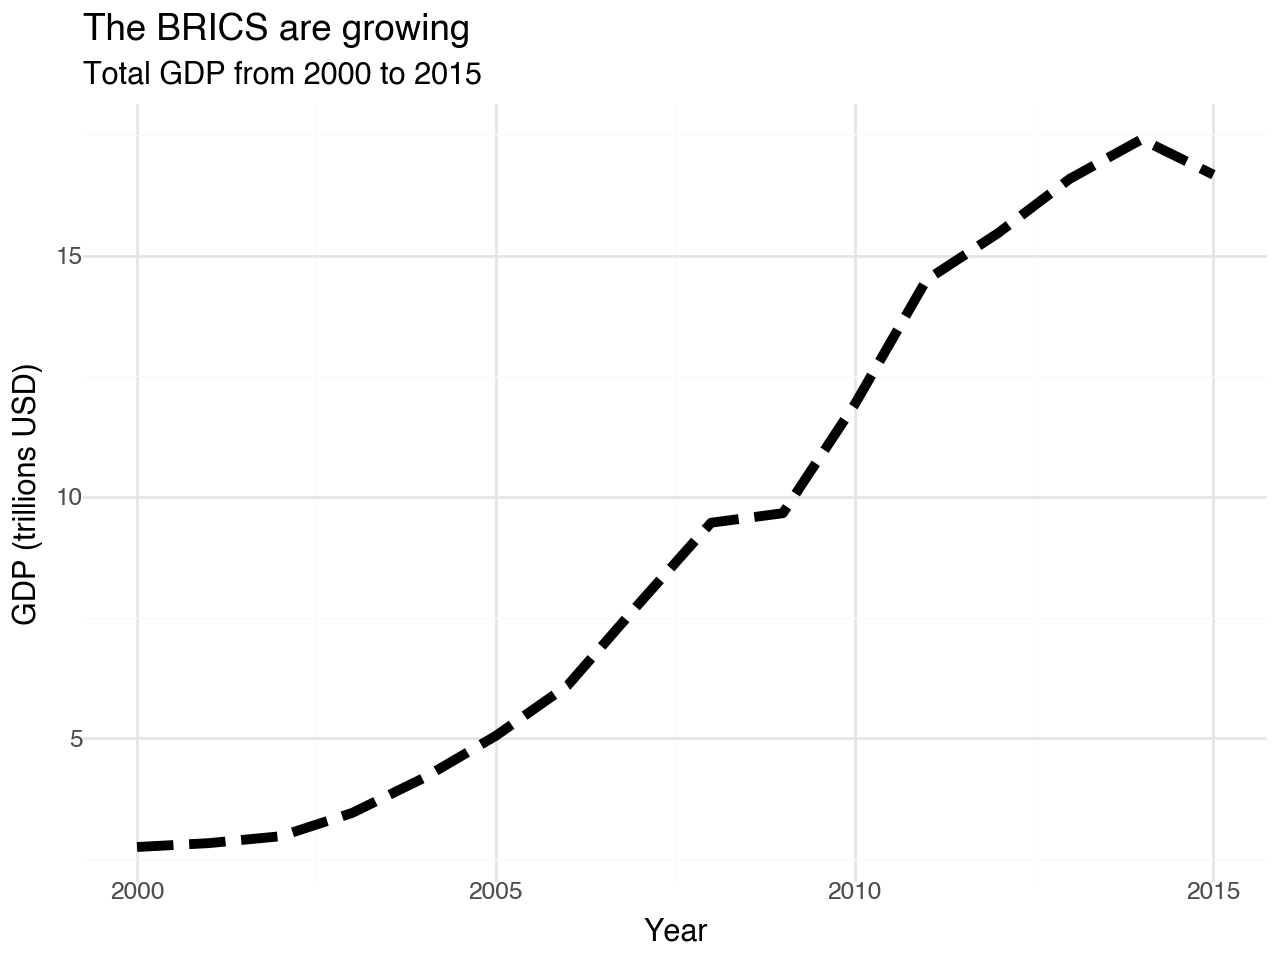

In [35]:
(
 ggplot()
 + geom_line(total_gdp_brics, aes("year", "gdp"), size = 2, linetype = "dashed")
 + theme_minimal()
 + labs(x = "Year", y = "GDP (trillions USD)",
        title = "The BRICS are growing",
        subtitle = "Total GDP from 2000 to 2015")
 )

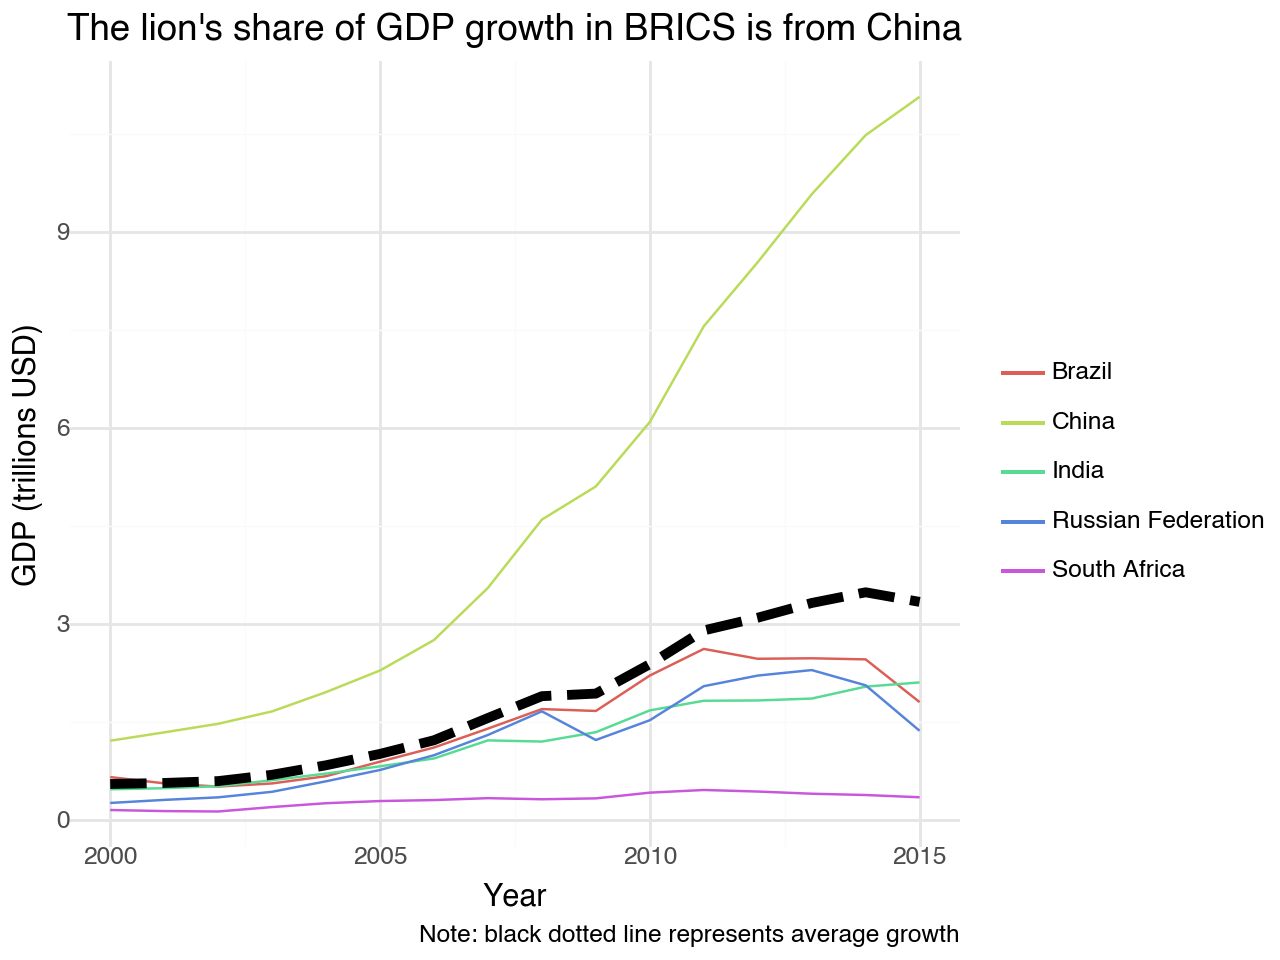

In [36]:
(
 ggplot()
 + geom_line(gdp_brics, aes("year", "gdp", colour = "country_name"))
 + geom_line(mean_gdp_brics, aes("year", "gdp"), size = 2, linetype = "dashed")
 + theme_minimal()
 + labs(x = "Year", y = "GDP (trillions USD)", colour = "",
        title = "The lion's share of GDP growth in BRICS is from China",
        caption = "Note: black dotted line represents average growth")
 )

## Converting BRICS 2015 data to JSON

A convenience function to produce JSON from tables

In [37]:
gdp_brics

,country_name,year,gdp
26,Brazil,2000,0.655448
41,China,2000,1.211332
88,India,2000,0.468396
160,Russian Federation,2000,0.259710
176,South Africa,2000,0.151753
...,...,...,...
3281,Brazil,2015,1.802212
3296,China,2015,11.061573
3343,India,2015,2.103588
3415,Russian Federation,2015,1.363482


In [38]:

gdp_brics_2015 = gdp_brics.query("year == 2015").reset_index(drop = True).drop(columns = 'year')
gdp_brics_2015[["country_name"]] = gdp_brics_2015[["country_name"]].astype("string")
gdp_brics_2015[["gdp"]] = gdp_brics_2015[["gdp"]].astype("float")
print(gdp_brics_2015.info())

import json
gdp_brics_2015_json = gdp_brics_2015.to_json()

from pprint import pprint as pp
pp(gdp_brics_2015_json, depth=2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  5 non-null      string 
 1   gdp           5 non-null      float64
dtypes: float64(1), string(1)
memory usage: 208.0 bytes
None
('{"country_name":{"0":"Brazil","1":"China","2":"India","3":"Russian '
 'Federation","4":"South '
 'Africa"},"gdp":{"0":1.8022122069,"1":11.0615726186,"2":2.10358836,"3":1.3634821822,"4":0.3467097905}}')


<img src="./content/DS101_data/gdb_brics_2010a.png" alt="GDP BRICS 2010" style="width: 200px;"/>

## JSON output

JSON notation has the same formatting structure as a Python '**dictionary**'

```json
{
  "country_name": {
    "0": "Brazil",
    "1": "China",
    "2": "India",
    "3":"Russian Federation",
    "4":"South Africa"},
  "gdp":{"0":1.8022122069,
        "1":11.0615726186,
        "2":2.10358836,
        "3":1.3634821822,
        "4":0.3467097905}
}
```


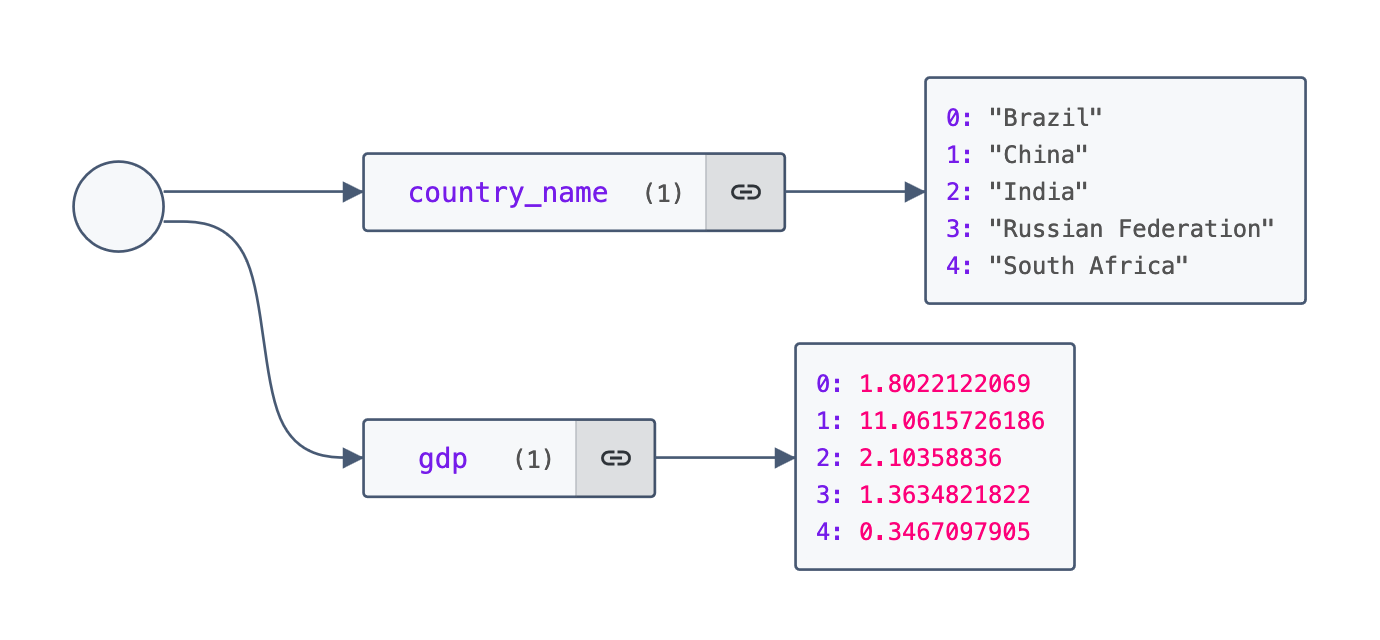



### Re-formatted

In [39]:
gdp_brics_2015_json = gdp_brics_2015.to_json(orient = "index")


from pprint import pprint as pp
pp(gdp_brics_2015_json, depth=2)

('{"0":{"country_name":"Brazil","gdp":1.8022122069},"1":{"country_name":"China","gdp":11.0615726186},"2":{"country_name":"India","gdp":2.10358836},"3":{"country_name":"Russian '
 'Federation","gdp":1.3634821822},"4":{"country_name":"South '
 'Africa","gdp":0.3467097905}}')


```json
{
  "0": {
    "country_name": "Brazil",
    "gdp": 1.8022122069
  },
  "1": {
    "country_name": "China",
    "gdp": 11.0615726186
  },
  "2": {
    "country_name": "India",
    "gdp": 2.10358836
  },
  "3": {
    "country_name":"Russian Federation","gdp":1.3634821822},
  "4":{"country_name":"South Africa","gdp":0.3467097905}
}
```

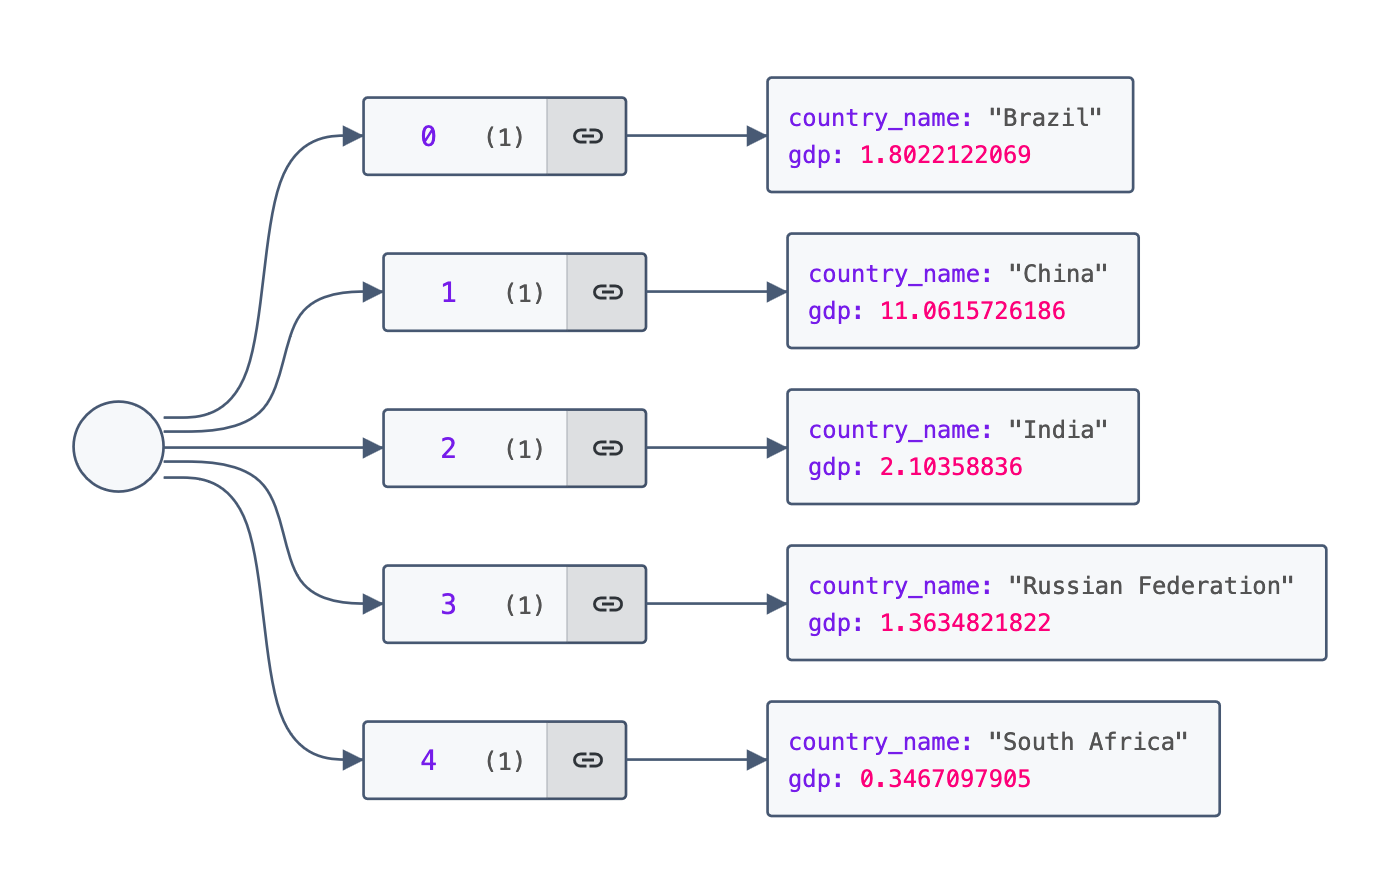

In [42]:
 print(
       gdp_brics.query("year == 2015").reset_index(drop = True).drop(columns = "year").to_json()
       )

{"country_name":{"0":"Brazil","1":"China","2":"India","3":"Russian Federation","4":"South Africa"},"gdp":{"0":1.8022122069,"1":11.0615726186,"2":2.10358836,"3":1.3634821822,"4":0.3467097905}}


## Converting BRICS 2010 data to HTML

A convenience function to produce HTML tables (you can embed these into your own web reports)

In [44]:
html = gdp_brics.query("year == 2010").reset_index(drop = True).drop(columns = "year").to_html()
html_op = os.path.join('gdp_brics_2010.html')

with open(html_op, 'w') as html_file:
    html_file.write(html)

print(html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>country_name</th>
      <th>gdp</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Brazil</td>
      <td>2.208838</td>
    </tr>
    <tr>
      <th>1</th>
      <td>China</td>
      <td>6.087192</td>
    </tr>
    <tr>
      <th>2</th>
      <td>India</td>
      <td>1.675616</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Russian Federation</td>
      <td>1.524917</td>
    </tr>
    <tr>
      <th>4</th>
      <td>South Africa</td>
      <td>0.417364</td>
    </tr>
  </tbody>
</table>


In [45]:
g7 = ["Canada", "France", "Germany", "Italy", "Japan", "United Kingdom", "United States"]
gdp_g7 = gdp_long.query("country_name in @g7")
#gdp_g7["gdp"] = gdp_g7["gdp"].astype(float) / 1e12
gdp_g7.loc[:,"gdp"] = gdp_g7["gdp"].astype(float) / 1e12
print(gdp_g7)

        country_name  year        gdp
35            Canada  2000   0.744773
67            France  2000   1.365640
72           Germany  2000   1.947982
95             Italy  2000   1.146677
97             Japan  2000   4.968359
...              ...   ...        ...
3327         Germany  2015   3.357586
3350           Italy  2015   1.836638
3352           Japan  2015   4.444931
3460  United Kingdom  2015   2.927911
3461   United States  2015  18.295019

[112 rows x 3 columns]


In [46]:
total_gdp_g7 = gdp_g7.groupby("year", as_index = False)["gdp"].sum()
mean_gdp_g7 = gdp_g7.groupby("year", as_index = False)["gdp"].mean()

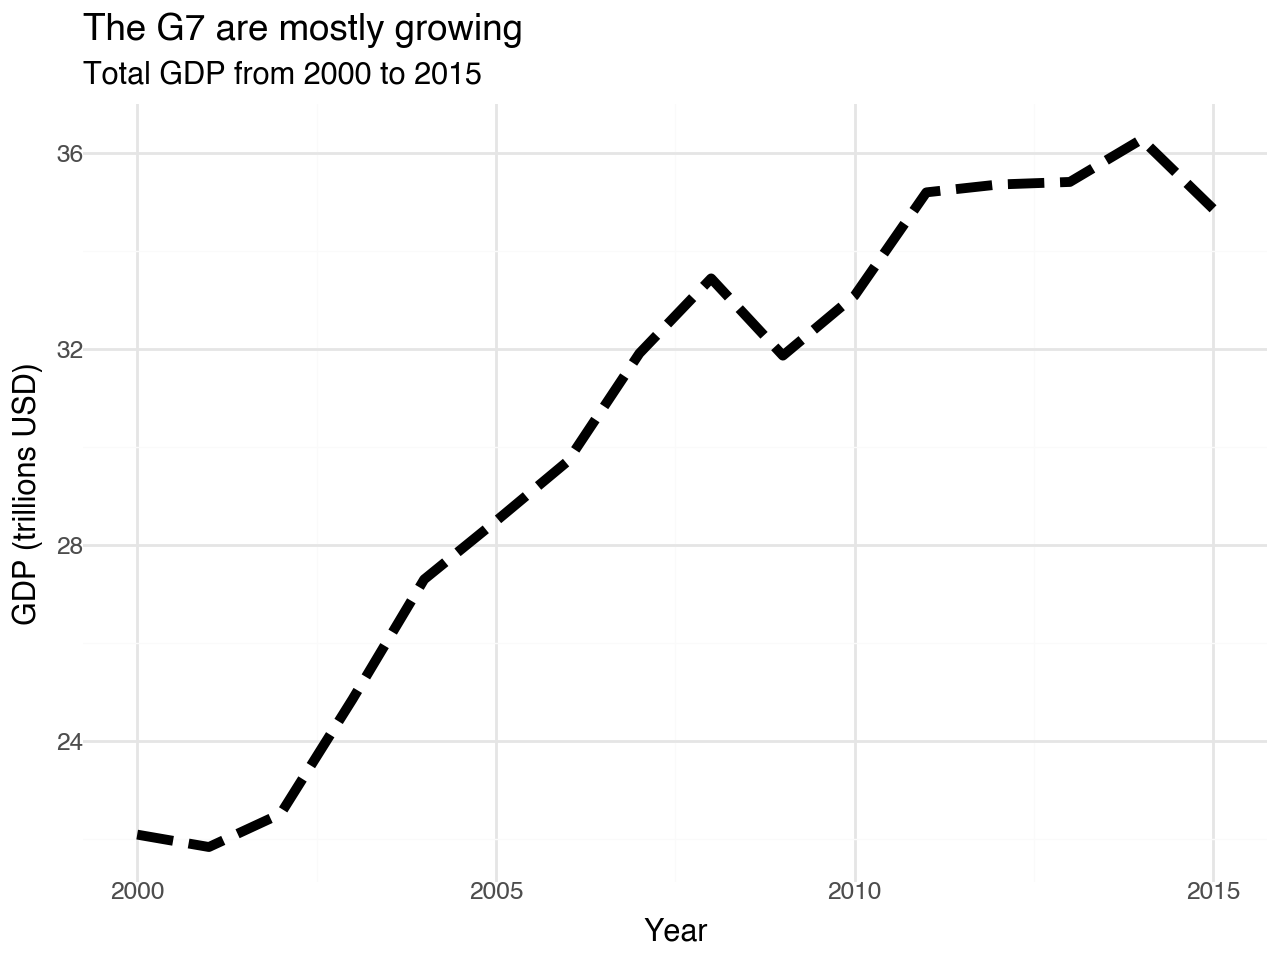

In [47]:
(
 ggplot()
 + geom_line(total_gdp_g7, aes("year", "gdp"), size = 2, linetype = "dashed")
 + theme_minimal()
 + labs(x = "Year", y = "GDP (trillions USD)",
        title = "The G7 are mostly growing",
        subtitle = "Total GDP from 2000 to 2015")
 )

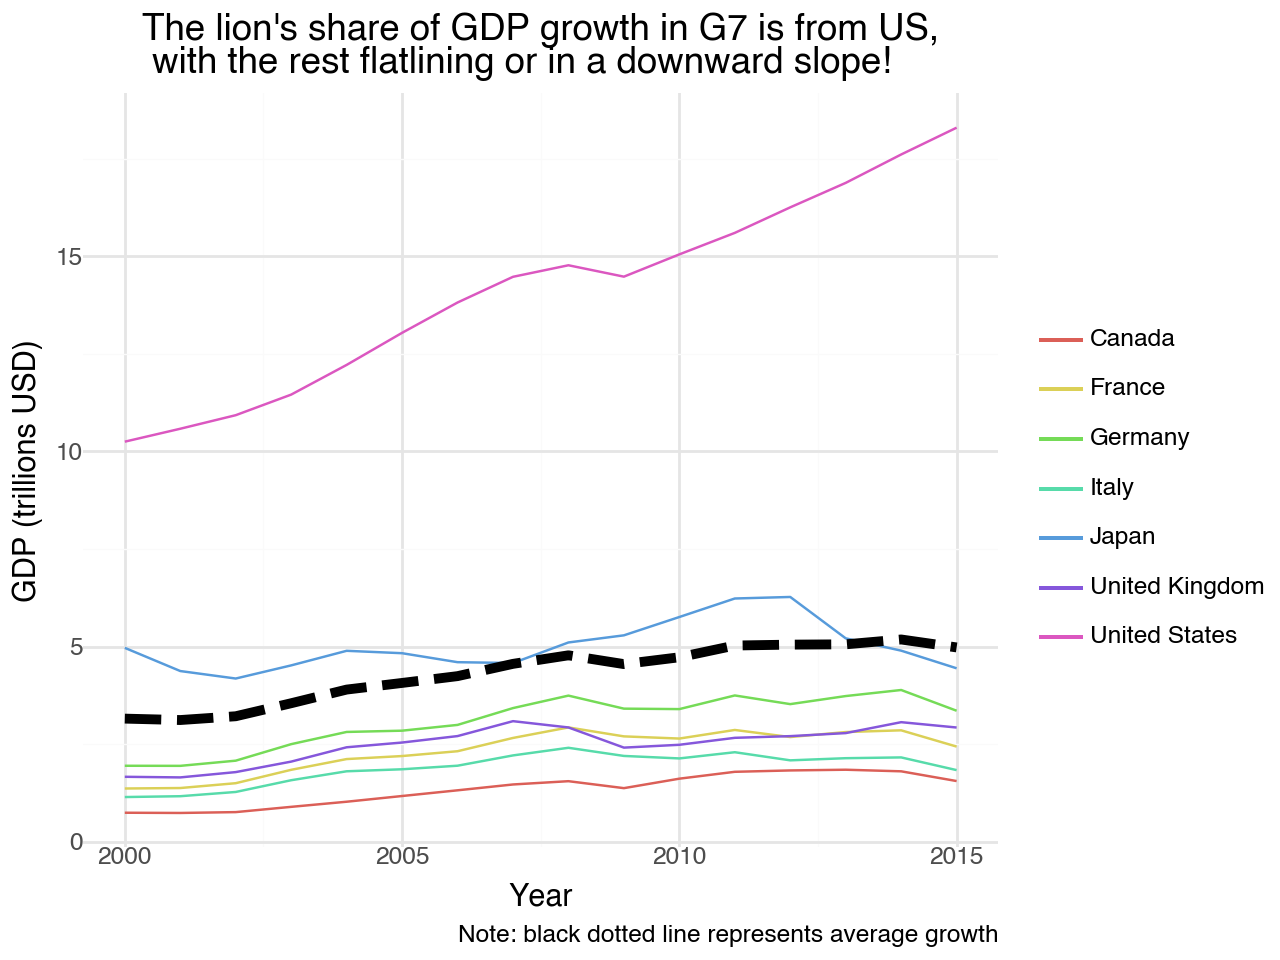

In [48]:
(
 ggplot()
 + geom_line(gdp_g7, aes("year", "gdp", colour = "country_name"))
 + geom_line(mean_gdp_g7, aes("year", "gdp"), size = 2, linetype = "dashed")
 + theme_minimal()
 + labs(x = "Year", y = "GDP (trillions USD)", colour = "",
        title = "The lion's share of GDP growth in G7 is from US,\n with the rest flatlining or in a downward slope!",
        caption = "Note: black dotted line represents average growth")
 )